In [6]:
import pandas as pd

# Load the dataset
cols = pd.read_csv("https://raw.githubusercontent.com/pointOfive/stat130chat130/main/CP/var_names.csv")
data = pd.read_csv("https://raw.githubusercontent.com/pointOfive/stat130chat130/main/CP/CSCS_data_anon.csv",
                   na_values=["9999", "", " ", "Presented but no response", "NA"])

# Remove empty columns
empty = (data.isna().sum() == data.shape[0])
data = data[empty.index[~empty]]

# Keep only the recommended data
dataV2 = data[data.REMOVE_case == 'No'].copy()

# Select participants who are part of the cohort data
dataV2_cohort = dataV2[dataV2.SURVEY_cohort_participant].copy()

# Remove year 2023
dataV2_cohortV2 = dataV2_cohort[dataV2_cohort.SURVEY_collection_year != 2023].copy()

# Remove columns with too many missing values
missingness_limit = 100
columns2keep = dataV2_cohortV2.isna().sum() < missingness_limit
columns2keep = columns2keep.index[columns2keep]
dataV2_cohortV3 = dataV2_cohortV2[columns2keep].copy()

# Select only the requested columns
selected_columns = [
    # Online activities
    "CONNECTION_activities_checked_in_p3m",
    "CONNECTION_activities_computer_games_p3m",
    "CONNECTION_activities_discussion_group_p3m",
    "CONNECTION_activities_group_video_chat_p3m",
    "CONNECTION_activities_onlinegames_p3m",
    "CONNECTION_activities_phone_p3m",
    "CONNECTION_activities_text_or_messaged_p3m",
    "CONNECTION_activities_video_chat_p3m",
    # Offline activities
    "CONNECTION_activities_board_games_p3m",
    "CONNECTION_activities_church_p3m",
    "CONNECTION_activities_coffee_p3m",
    "CONNECTION_activities_community_p3m",
    "CONNECTION_activities_helped_p3m",
    "CONNECTION_activities_hug_p3m",
    "CONNECTION_activities_kissed_p3m",
    "CONNECTION_activities_letter_or_email_p3m",
    "CONNECTION_activities_meeting_work_p3m",
    "CONNECTION_activities_new_friend_p3m",
    "CONNECTION_activities_sex_p3m",
    "CONNECTION_activities_talked_day_p3m",
    "CONNECTION_activities_talked_family_p3m",
    "CONNECTION_activities_talked_hobbies_p3m",
    "CONNECTION_activities_talked_job_p3m",
    "CONNECTION_activities_visited_family_p3m",
    "CONNECTION_activities_visited_friends_p3m",
    "CONNECTION_activities_walk_p3m",
    'WELLNESS_subjective_happiness_scale_score',
    'WELLNESS_phq_score', 
    'WELLNESS_gad_score'
]

filtered_data = dataV2_cohortV3[selected_columns]

filtered_data = filtered_data.dropna(
    subset=["WELLNESS_subjective_happiness_scale_score", "WELLNESS_phq_score", "WELLNESS_gad_score"]
)

filtered_data.fillna("Not in the past three months", inplace=True)

# The resulting data
filtered_data


/tmp/ipykernel_131/2196170575.py:5: DtypeWarning: Columns (129,408,630,671,689,978,1001,1002,1006,1007,1008,1080,1113,1115,1116,1117,1118,1119,1120,1121,1124,1125,1126,1127,1128,1213,1214,1215,1216,1217,1218,1263,1266,1342,1343,1344,1345,1346,1347,1348,1349,1390,1391,1393,1439,1442,1463,1546,1549,1552,1555,1558,1561) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv("https://raw.githubusercontent.com/pointOfive/stat130chat130/main/CP/CSCS_data_anon.csv",


,CONNECTION_activities_checked_in_p3m,CONNECTION_activities_computer_games_p3m,CONNECTION_activities_discussion_group_p3m,CONNECTION_activities_group_video_chat_p3m,CONNECTION_activities_onlinegames_p3m,CONNECTION_activities_phone_p3m,CONNECTION_activities_text_or_messaged_p3m,CONNECTION_activities_video_chat_p3m,CONNECTION_activities_board_games_p3m,CONNECTION_activities_church_p3m,...,CONNECTION_activities_talked_day_p3m,CONNECTION_activities_talked_family_p3m,CONNECTION_activities_talked_hobbies_p3m,CONNECTION_activities_talked_job_p3m,CONNECTION_activities_visited_family_p3m,CONNECTION_activities_visited_friends_p3m,CONNECTION_activities_walk_p3m,WELLNESS_subjective_happiness_scale_score,WELLNESS_phq_score,WELLNESS_gad_score
19,Daily or almost daily,Not in the past three months,Monthly,Less than monthly,Not in the past three months,A few times a week,Weekly,Less than monthly,Not in the past three months,Not in the past three months,...,Weekly,Weekly,Less than monthly,Weekly,A few times a month,Not in the past three months,Daily or almost daily,5.00,1.0,0.0
21,Less than monthly,Not in the past three months,Not in the past three months,Not in the past three months,Not in the past three months,Daily or almost daily,Weekly,Not in the past three months,Less than monthly,Not in the past three months,...,Weekly,Weekly,Less than monthly,Weekly,Monthly,Monthly,A few times a week,5.25,1.0,0.0
71,A few times a week,Not in the past three months,Not in the past three months,Not in the past three months,Not in the past three months,Daily or almost daily,A few times a week,A few times a week,Not in the past three months,Not in the past three months,...,A few times a week,Daily or almost daily,Not in the past three months,Daily or almost daily,A few times a week,A few times a week,A few times a month,6.00,0.0,0.0
77,A few times a month,Not in the past three months,A few times a month,Not in the past three months,Weekly,A few times a week,A few times a month,Less than monthly,Not in the past three months,Not in the past three months,...,Weekly,Weekly,A few times a week,Monthly,Monthly,A few times a month,Less than monthly,6.00,0.0,0.0
78,Weekly,Not in the past three months,A few times a month,Not in the past three months,Weekly,Weekly,Weekly,Less than monthly,Not in the past three months,Not in the past three months,...,A few times a week,A few times a week,A few times a week,Monthly,A few times a month,A few times a month,Monthly,6.00,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11379,A few times a week,Not in the past three months,Monthly,Monthly,Not in the past three months,A few times a month,Less than monthly,A few times a week,Not in the past three months,Not in the past three months,...,Weekly,Weekly,Daily or almost daily,Weekly,Not in the past three months,A few times a month,A few times a week,3.00,3.0,4.0
11380,Weekly,Not in the past three months,Monthly,A few times a month,Not in the past three months,Less than monthly,Weekly,A few times a month,A few times a month,Not in the past three months,...,A few times a week,Weekly,A few times a week,A few times a month,Not in the past three months,Monthly,A few times a week,3.50,3.0,2.0
11412,A few times a week,Not in the past three months,Weekly,Monthly,Not in the past three months,Daily or almost daily,Daily or almost daily,Weekly,Less than monthly,Not in the past three months,...,A few times a week,Daily or almost daily,A few times a week,Monthly,Weekly,A few times a week,A few times a week,4.75,1.0,2.0
11428,A few times a month,Not in the past three months,Not in the past three months,Not in the past three months,Not in the past three months,Daily or almost daily,Daily or almost daily,A few times a week,Not in the past three months,Less than monthly,...,Weekly,Weekly,Weekly,A few times a week,Monthly,Not in the past three months,Less than monthly,3.75,3.0,2.0


In [15]:
# Columns you want to select
selected_columns = [
    "CONNECTION_activities_checked_in_p3m",
    "CONNECTION_activities_computer_games_p3m",
    "CONNECTION_activities_discussion_group_p3m",
    "CONNECTION_activities_group_video_chat_p3m",
    "CONNECTION_activities_onlinegames_p3m",
    "CONNECTION_activities_phone_p3m",
    "CONNECTION_activities_text_or_messaged_p3m",
    "CONNECTION_activities_video_chat_p3m",
    "CONNECTION_activities_board_games_p3m",
    "CONNECTION_activities_church_p3m",
    "CONNECTION_activities_coffee_p3m",
    "CONNECTION_activities_community_p3m",
    "CONNECTION_activities_helped_p3m",
    "CONNECTION_activities_hug_p3m",
    "CONNECTION_activities_kissed_p3m",
    "CONNECTION_activities_letter_or_email_p3m",
    "CONNECTION_activities_meeting_work_p3m",
    "CONNECTION_activities_new_friend_p3m",
    "CONNECTION_activities_sex_p3m",
    "CONNECTION_activities_talked_day_p3m",
    "CONNECTION_activities_talked_family_p3m",
    "CONNECTION_activities_talked_hobbies_p3m",
    "CONNECTION_activities_talked_job_p3m",
    "CONNECTION_activities_visited_family_p3m",
    "CONNECTION_activities_visited_friends_p3m",
    "CONNECTION_activities_walk_p3m",
    "WELLNESS_subjective_happiness_scale_score",
    "WELLNESS_phq_score",
    "WELLNESS_gad_score"
]


Missing columns: []


# Define a mapping for the categorical responses

In [44]:
# Define a mapping for the categorical responses
frequency_mapping = {
    "Not in the past three months": 0,
    "Less than monthly": 1,
    "Monthly": 2,
    "A few times a month": 3,
    "Weekly": 4,
    "A few times a week": 5,
    "Daily or almost daily": 6
}

# Apply the mapping to all object columns
object_columns = filtered_data.select_dtypes(include="object").columns
for col in object_columns:
    filtered_data[col] = filtered_data[col].map(frequency_mapping)


## Removed all the NAN in 'WELLNESS_subjective_happiness_scale_score', 'WELLNESS_phq_score', and 'WELLNESS_gad_score'

## Change the NAN in other columns into Not in the past three months

## filtered_data is our dataset

In [45]:
for col in filtered_data.columns:
    col_summary = filtered_data[col].value_counts(dropna=False)
    if len(col_summary)<11:
        print(col_summary, "\n")
    else:
        print(col, filtered_data[col].shape, "\n")

CONNECTION_activities_checked_in_p3m
5    147
6    145
3    145
4    137
1     77
0     73
2     73
Name: count, dtype: int64 

CONNECTION_activities_computer_games_p3m
0    644
1     51
2     29
3     28
4     15
5     15
6     15
Name: count, dtype: int64 

CONNECTION_activities_discussion_group_p3m
0    386
1    101
2     82
3     80
4     73
5     48
6     27
Name: count, dtype: int64 

CONNECTION_activities_group_video_chat_p3m
0    400
1    157
2     78
3     66
4     60
5     26
6     10
Name: count, dtype: int64 

CONNECTION_activities_onlinegames_p3m
0    591
6     53
1     44
3     35
4     29
5     26
2     19
Name: count, dtype: int64 

CONNECTION_activities_phone_p3m
6    183
5    158
4    155
3    130
1     68
2     63
0     40
Name: count, dtype: int64 

CONNECTION_activities_text_or_messaged_p3m
3    146
5    124
1    121
4    119
0    106
6     97
2     84
Name: count, dtype: int64 

CONNECTION_activities_video_chat_p3m
0    255
1    127
3    122
4    108
2     72
5   

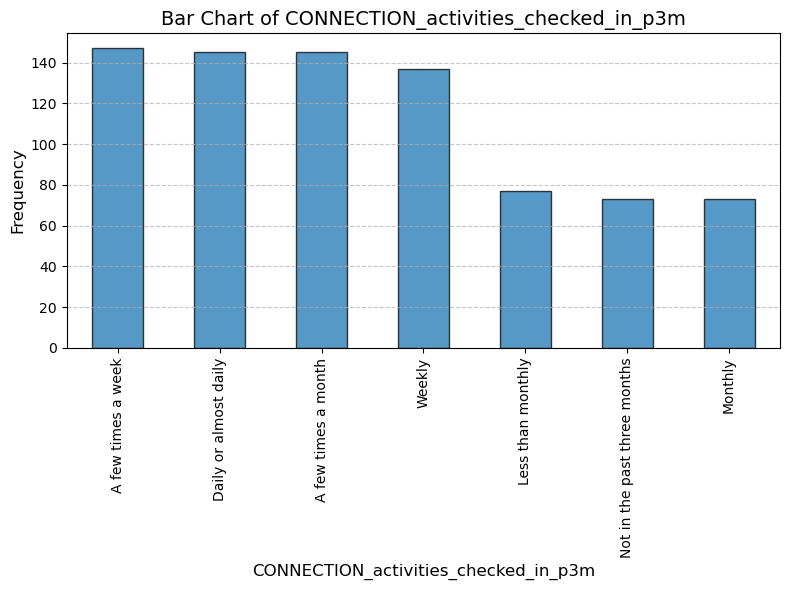

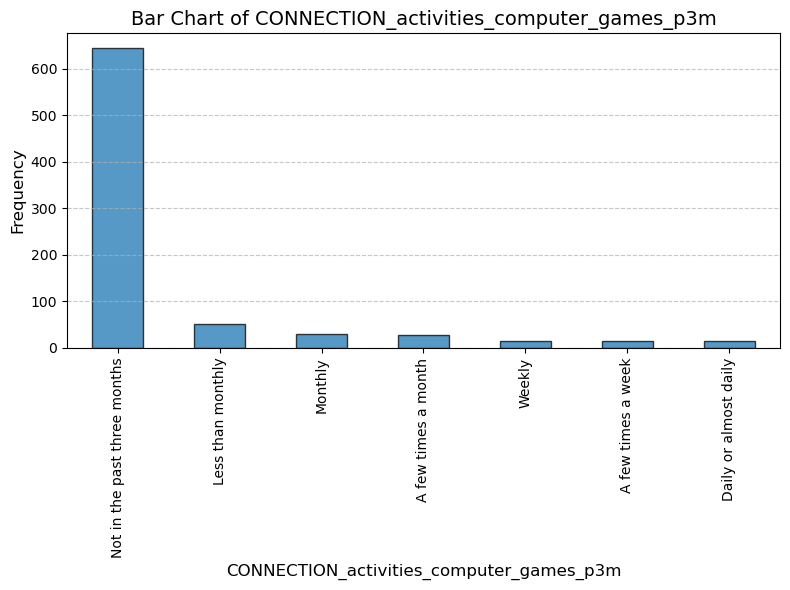

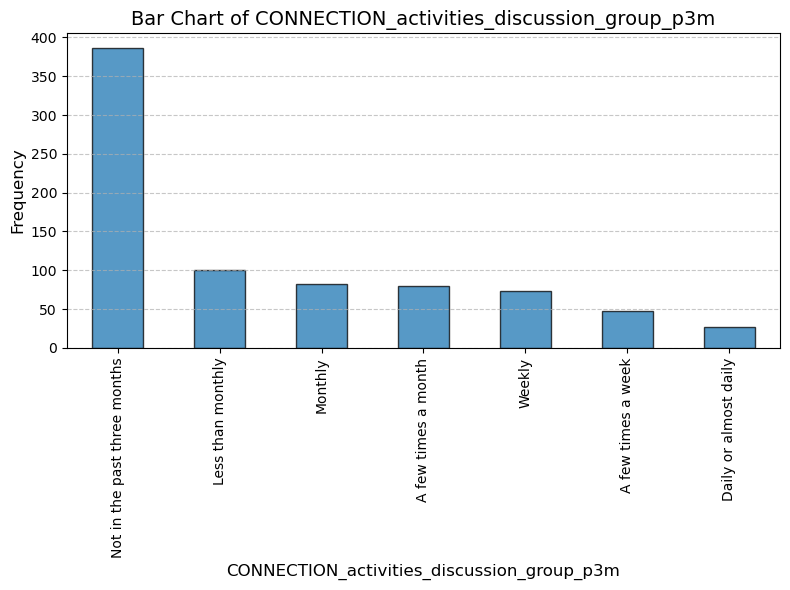

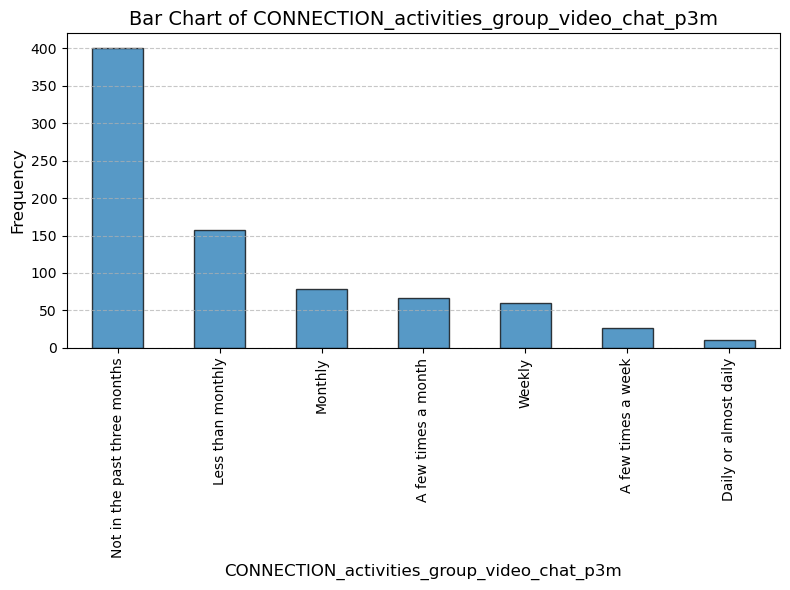

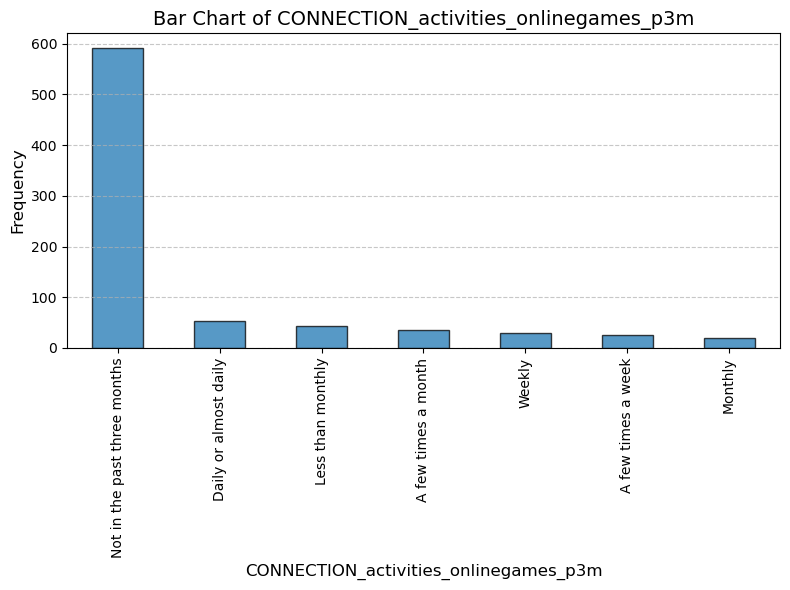

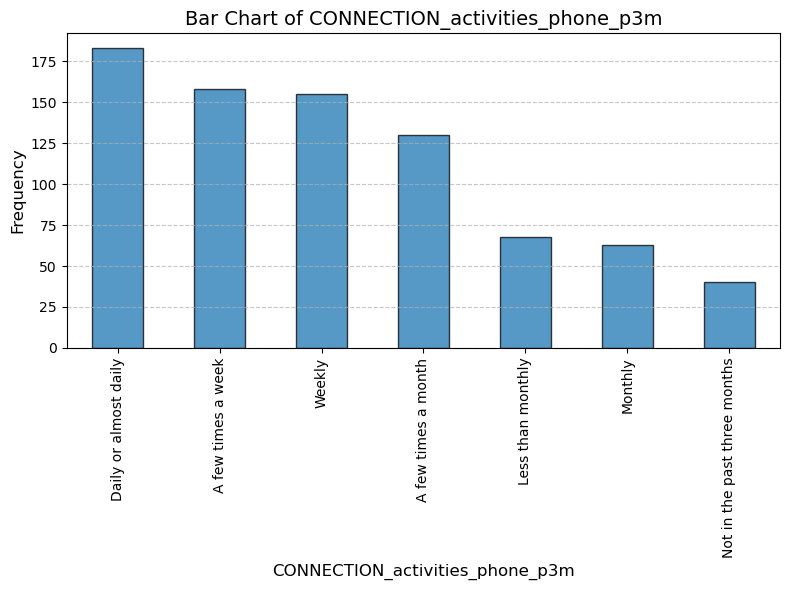

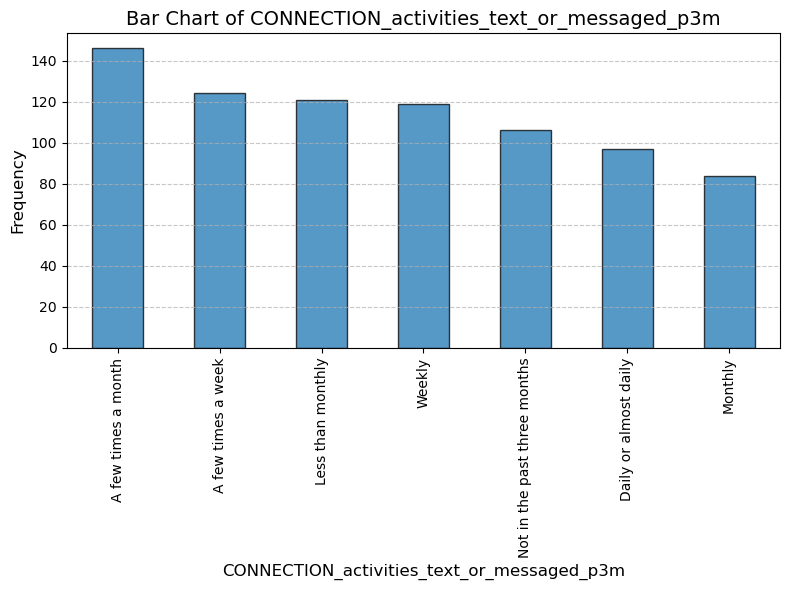

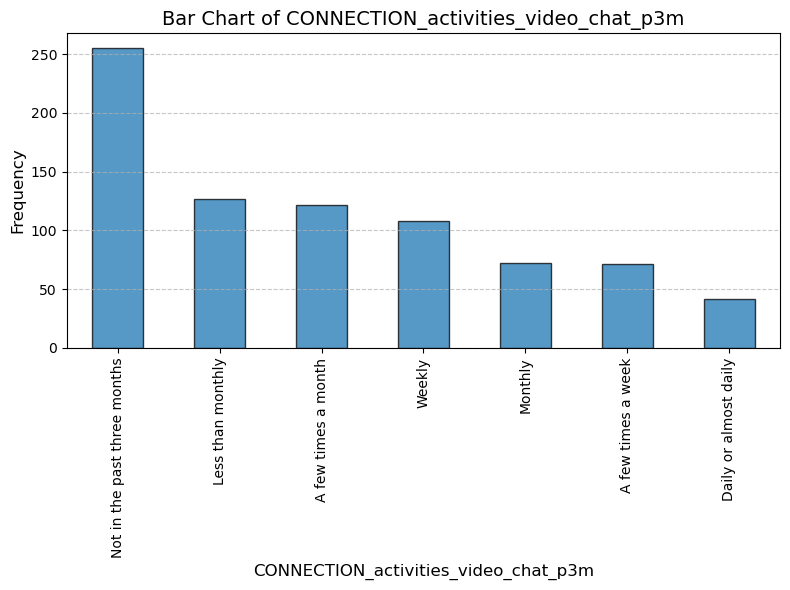

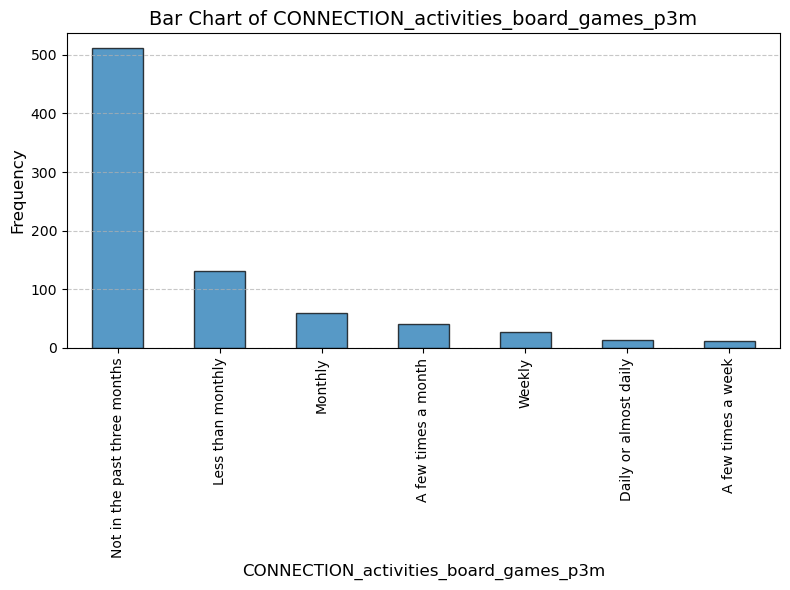

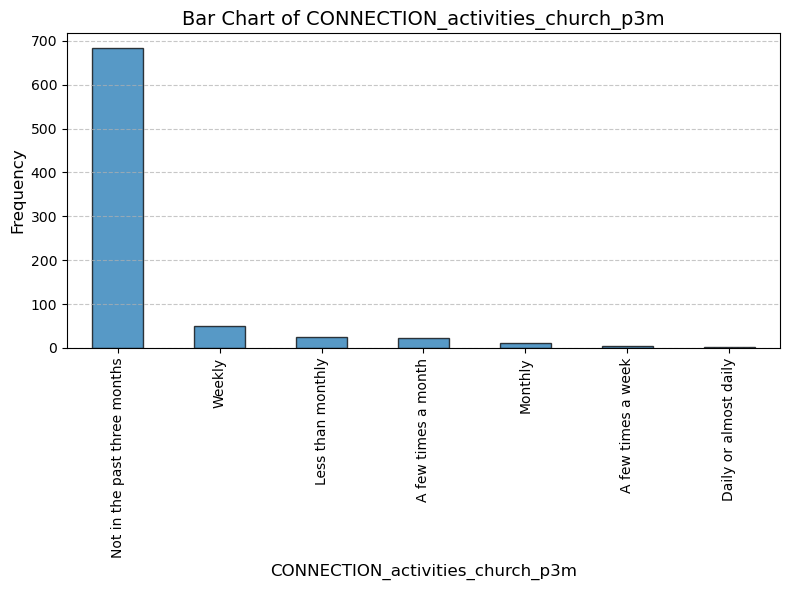

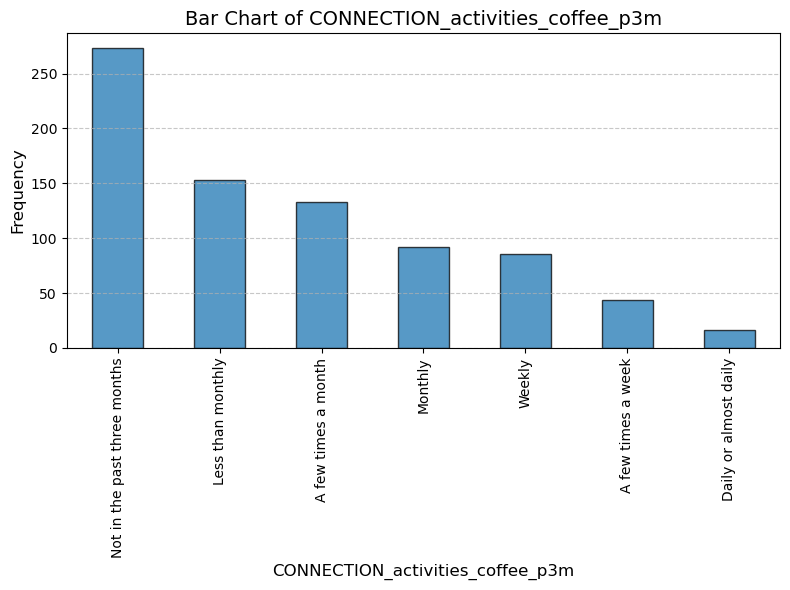

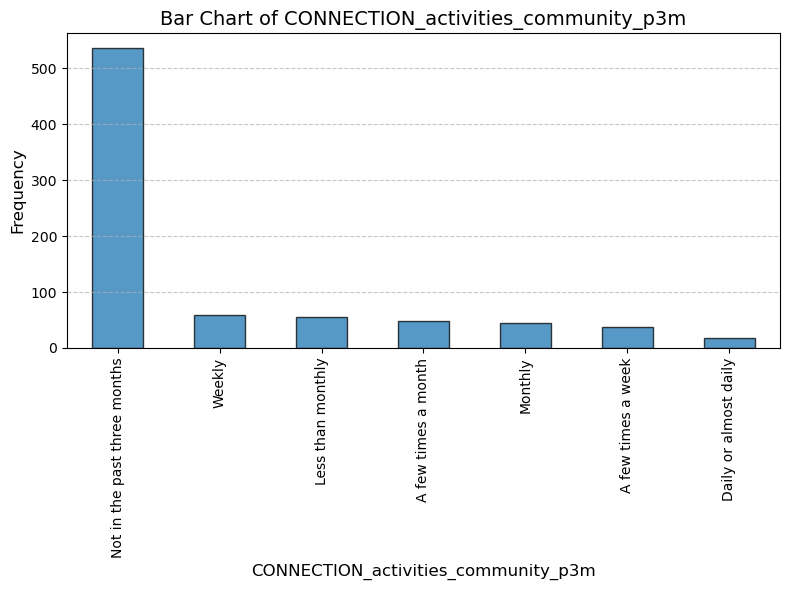

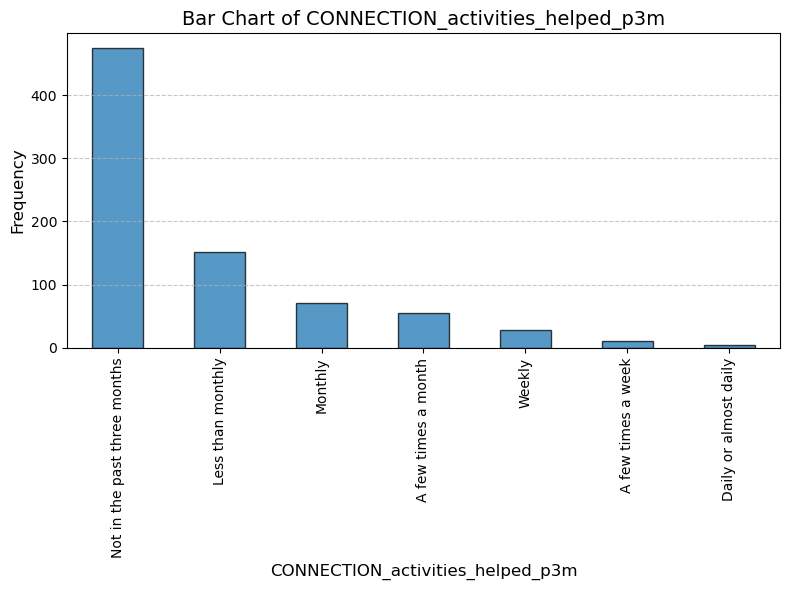

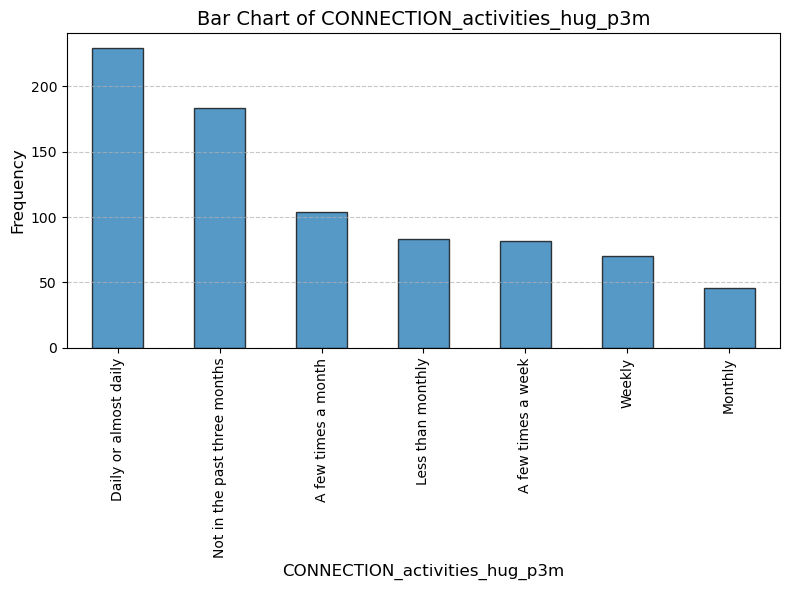

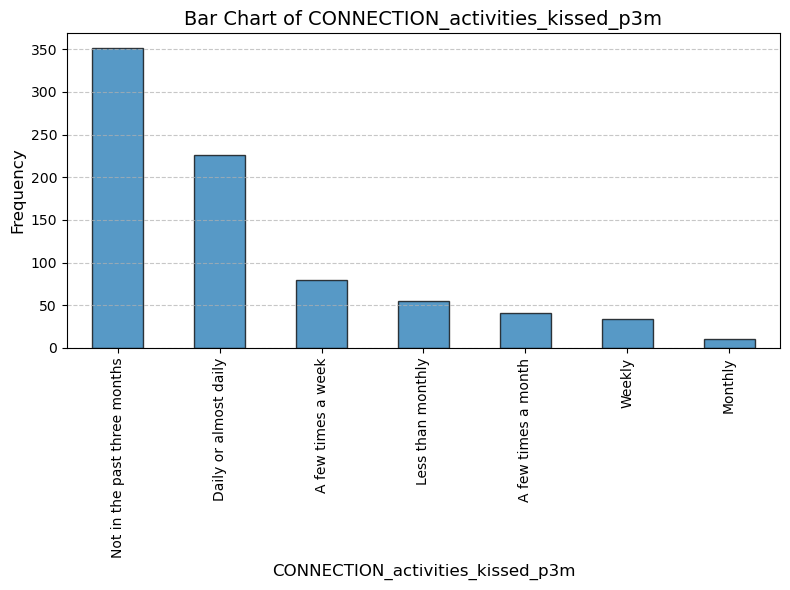

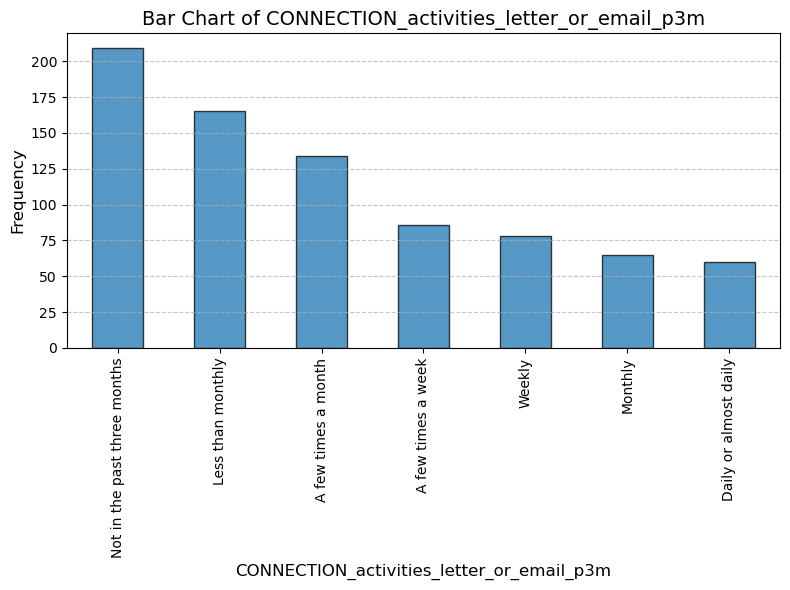

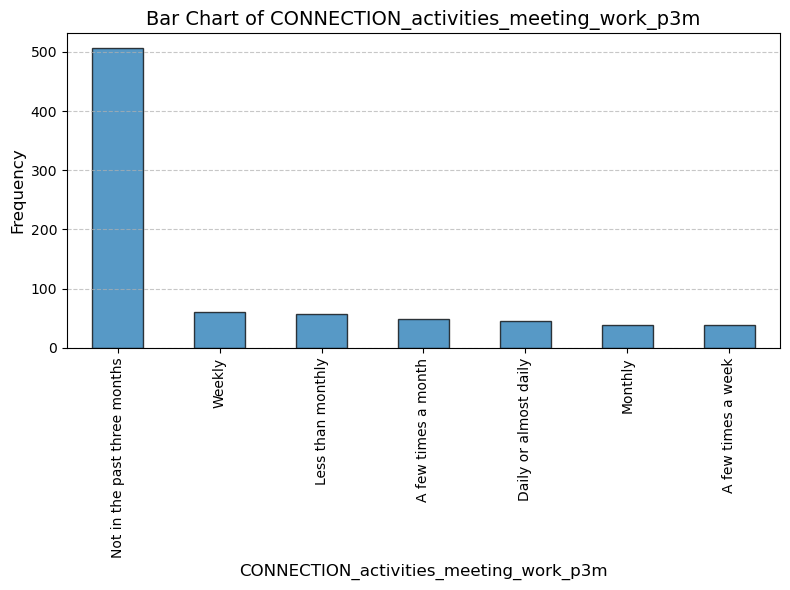

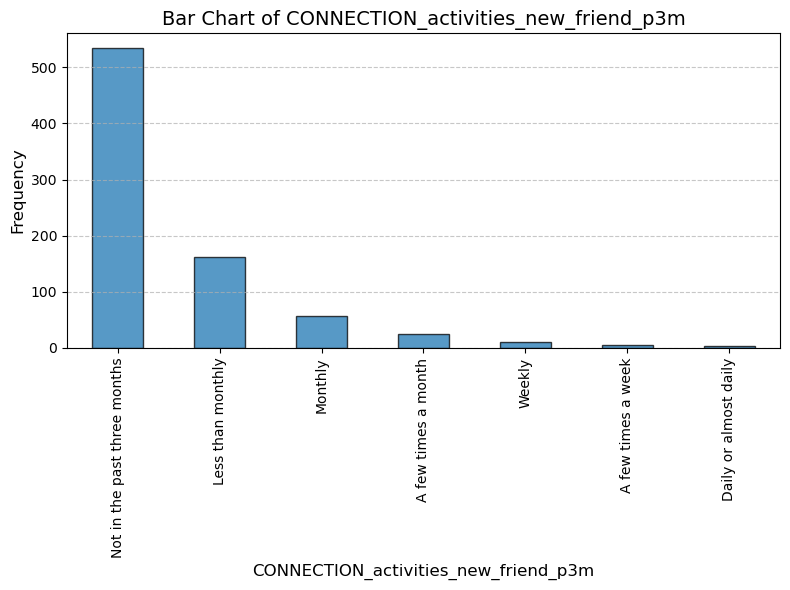

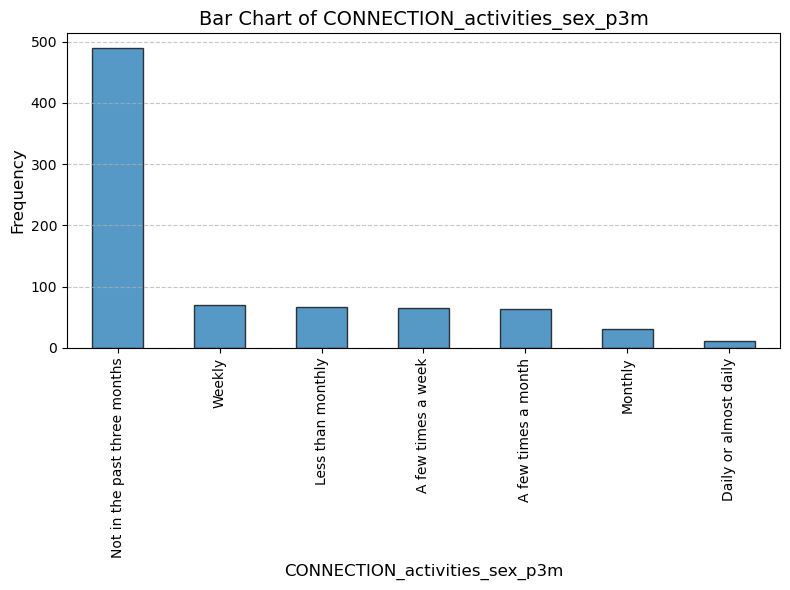

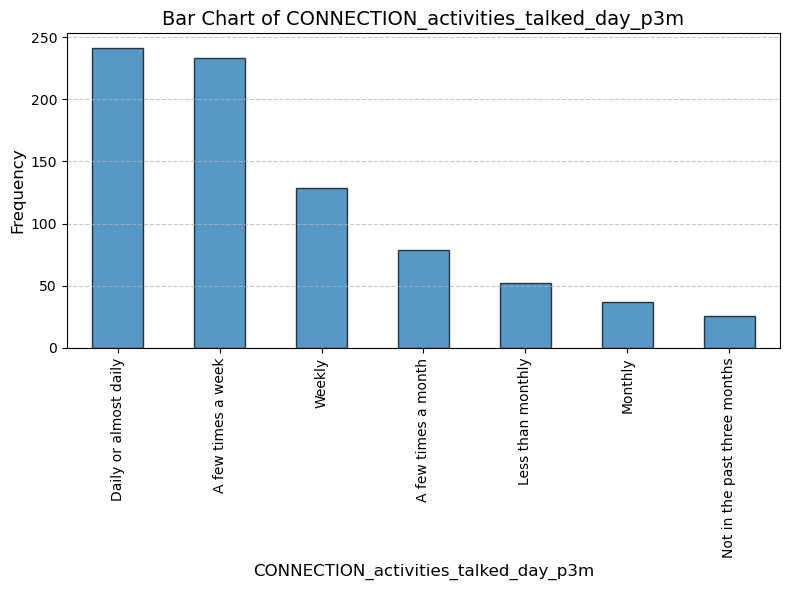

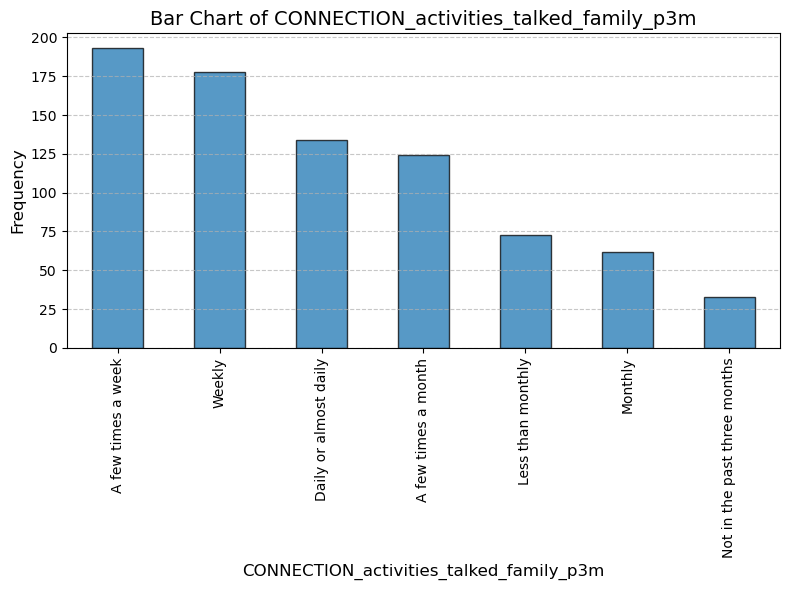

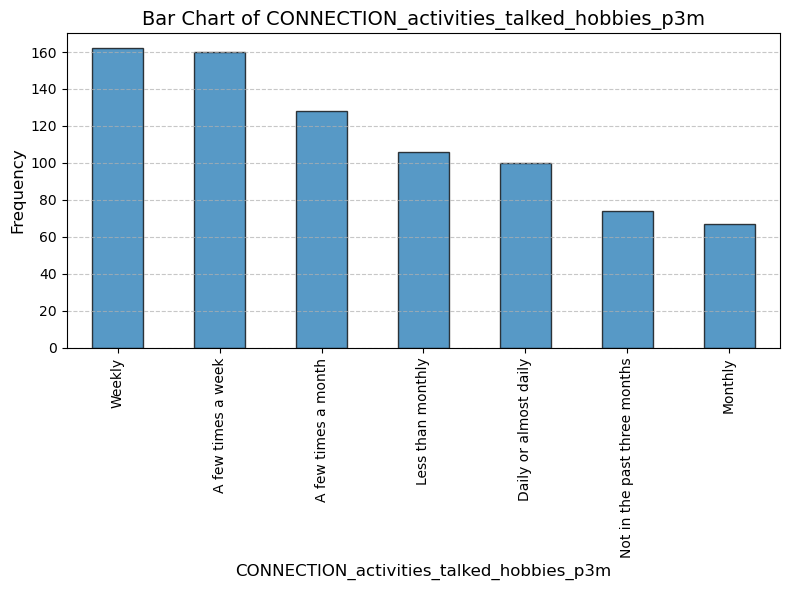

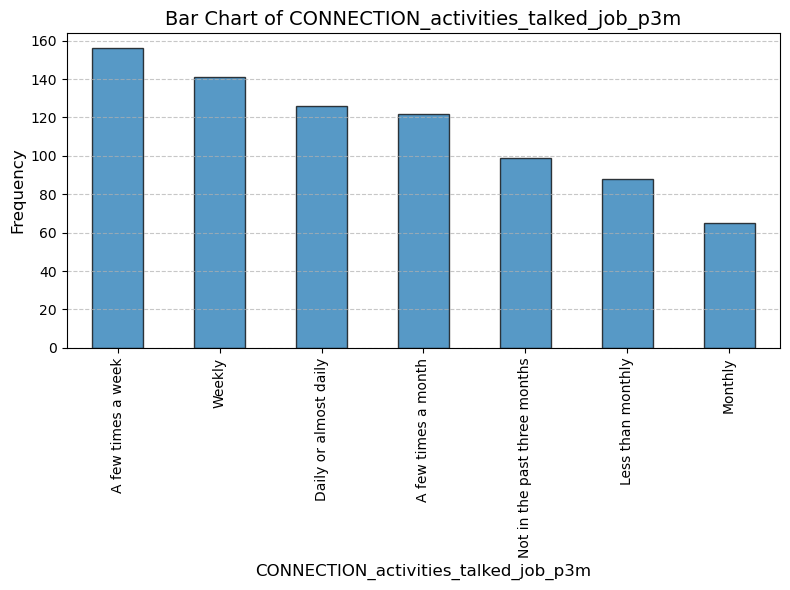

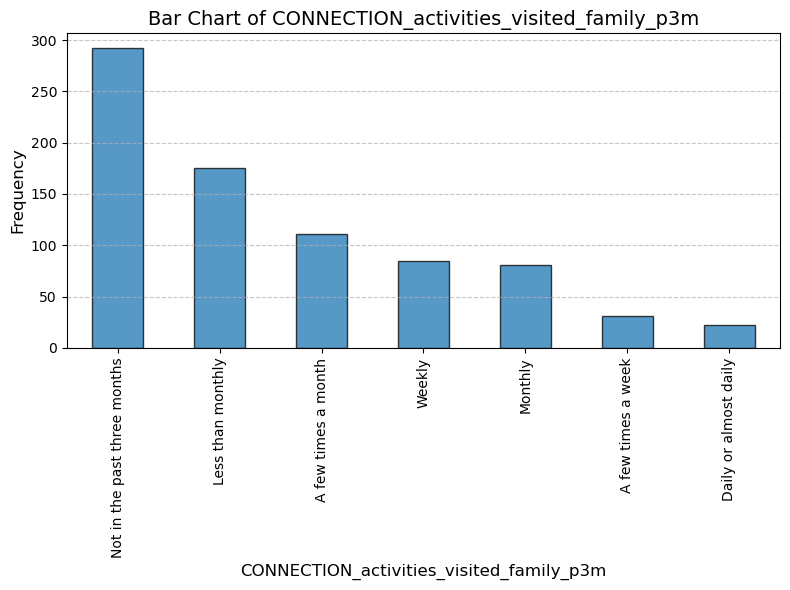

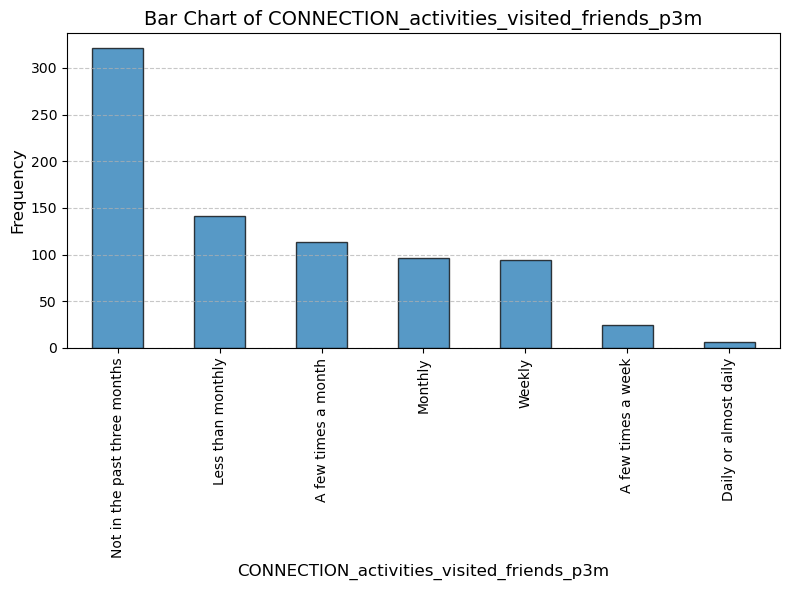

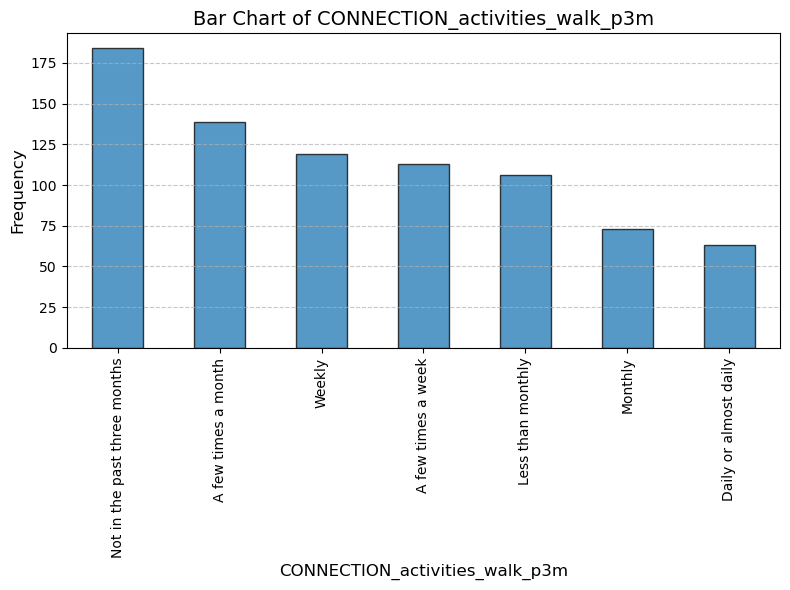

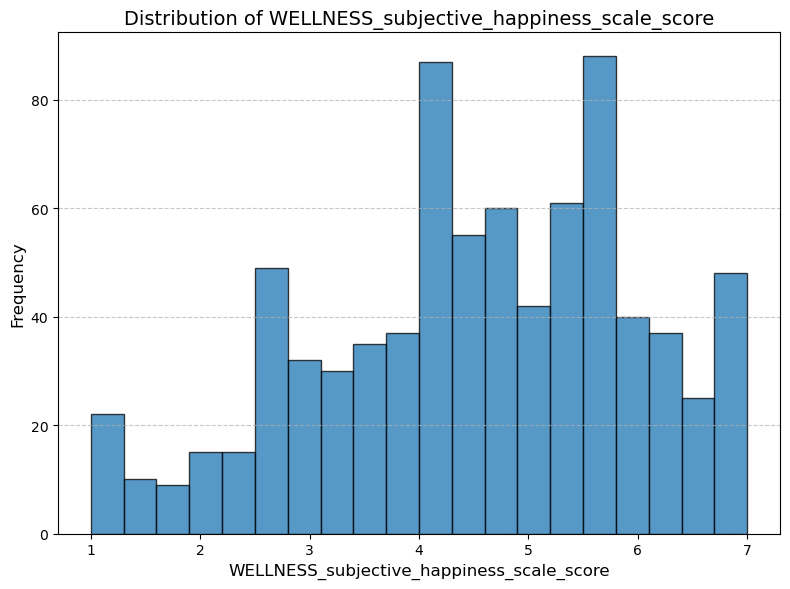

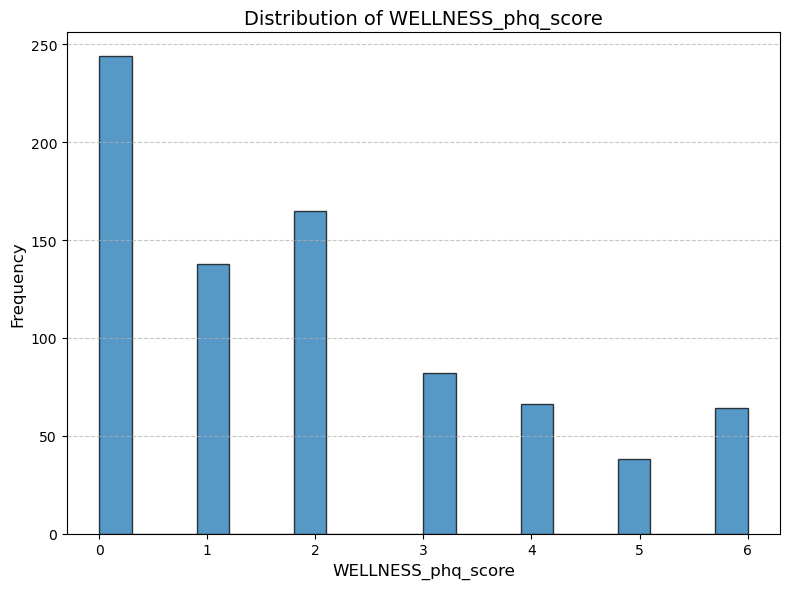

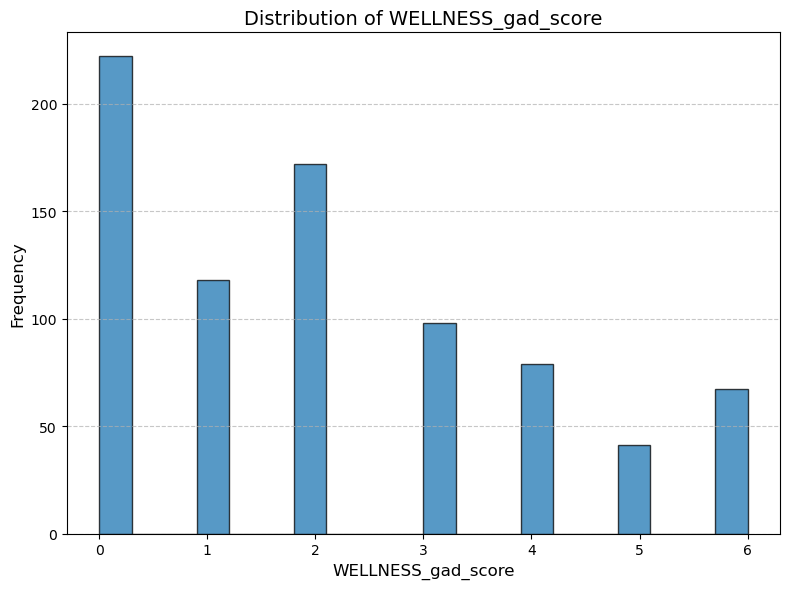

In [8]:
import matplotlib.pyplot as plt

# Function to create visualizations for each variable
def visualize_variable(data, column_name):
    plt.figure(figsize=(8, 6))
    if data[column_name].dtype in ['float64', 'int64']:
        # For numerical data, use histogram
        data[column_name].dropna().plot(kind='hist', bins=20, alpha=0.75, edgecolor='black')
        plt.title(f"Distribution of {column_name}", fontsize=14)
        plt.xlabel(column_name, fontsize=12)
        plt.ylabel("Frequency", fontsize=12)
    else:
        # For categorical data, use bar chart
        data[column_name].value_counts().plot(kind='bar', alpha=0.75, edgecolor='black')
        plt.title(f"Bar Chart of {column_name}", fontsize=14)
        plt.xlabel(column_name, fontsize=12)
        plt.ylabel("Frequency", fontsize=12)
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.show()

# Loop through each column in the filtered dataset and create a visualization
for column in filtered_data.columns:
    visualize_variable(filtered_data, column)


## independent variables(x)

### **Online Activities**
These involve digital communication, gaming, or other virtual interactions:
1. **CONNECTION_activities_chat_p3m**: Had an extended conversation via text or a messaging app.
2. **CONNECTION_activities_checked_in_p3m**: Sent a text/private message to someone just to check in.
3. **CONNECTION_activities_computer_games_p3m**: Played a computer or console (e.g., Wii, Xbox, PlayStation) game with others.
4. **CONNECTION_activities_discussion_group_p3m**: Participated in an online discussion group.
5. **CONNECTION_activities_group_video_chat_p3m**: Had a video chat with a GROUP of friends or family.
6. **CONNECTION_activities_onlinegames_p3m**: Played an online game with others.
7. **CONNECTION_activities_text_or_messaged_p3m**: Sent or received a text/private message.
8. **CONNECTION_activities_video_chat_p3m**: Had a video chat with a friend or family member.

---

### **Offline Activities**
These involve in-person, physical, or traditional forms of interaction:
1. **CONNECTION_activities_board_games_p3m**: Played a board game with others.
2. **CONNECTION_activities_chat_p3m**: Had an in-person, face-to-face conversation with someone.
3. **CONNECTION_activities_church_p3m**: Attended church, synagogue, temple, etc.
4. **CONNECTION_activities_coffee_p3m**: Met someone for a meal, drink, dessert, or cup of coffee.
5. **CONNECTION_activities_community_p3m**: Volunteered in the community.
6. **CONNECTION_activities_helped_p3m**: Helped a neighbor or friend with a task or chore (e.g., yard work, moving).
7. **CONNECTION_activities_hug_p3m**: Hugged someone.
8. **CONNECTION_activities_kissed_p3m**: Kissed someone.
9. **CONNECTION_activities_letter_or_email_p3m**: Wrote a letter or personal email to a friend or family member.
10. **CONNECTION_activities_meeting_work_p3m**: Attended a meeting at work.
11. **CONNECTION_activities_new_friend_p3m**: Made a new friend.
12. **CONNECTION_activities_phone_p3m**: Had a phone conversation with a friend or family member (could overlap as hybrid).
13. **CONNECTION_activities_sex_p3m**: Had sex with someone.
14. **CONNECTION_activities_talked_day_p3m**: Talked to someone about how their day was going.
15. **CONNECTION_activities_talked_family_p3m**: Talked to someone about their family.
16. **CONNECTION_activities_talked_hobbies_p3m**: Talked to someone about hobbies or interests.
17. **CONNECTION_activities_talked_job_p3m**: Talked to someone about their job.
18. **CONNECTION_activities_visited_family_p3m**: Visited with FAMILY at your or their home.
19. **CONNECTION_activities_visited_friends_p3m**: Visited with FRIENDS at your or their home.
20. **CONNECTION_activities_walk_p3m**: Went for a walk with someone.


In [46]:
dependent_variables = filtered_data[[
    # Online activities
    "CONNECTION_activities_checked_in_p3m",
    "CONNECTION_activities_computer_games_p3m",
    "CONNECTION_activities_discussion_group_p3m",
    "CONNECTION_activities_group_video_chat_p3m",
    "CONNECTION_activities_onlinegames_p3m",
    "CONNECTION_activities_phone_p3m",
    "CONNECTION_activities_text_or_messaged_p3m",
    "CONNECTION_activities_video_chat_p3m",
    # Offline activities
    "CONNECTION_activities_board_games_p3m",
    "CONNECTION_activities_church_p3m",
    "CONNECTION_activities_coffee_p3m",
    "CONNECTION_activities_community_p3m",
    "CONNECTION_activities_helped_p3m",
    "CONNECTION_activities_hug_p3m",
    "CONNECTION_activities_kissed_p3m",
    "CONNECTION_activities_letter_or_email_p3m",
    "CONNECTION_activities_meeting_work_p3m",
    "CONNECTION_activities_new_friend_p3m",
    "CONNECTION_activities_sex_p3m",
    "CONNECTION_activities_talked_day_p3m",
    "CONNECTION_activities_talked_family_p3m",
    "CONNECTION_activities_talked_hobbies_p3m",
    "CONNECTION_activities_talked_job_p3m",
    "CONNECTION_activities_visited_family_p3m",
    "CONNECTION_activities_visited_friends_p3m",
    "CONNECTION_activities_walk_p3m"
]]
dependent_variables

,CONNECTION_activities_checked_in_p3m,CONNECTION_activities_computer_games_p3m,CONNECTION_activities_discussion_group_p3m,CONNECTION_activities_group_video_chat_p3m,CONNECTION_activities_onlinegames_p3m,CONNECTION_activities_phone_p3m,CONNECTION_activities_text_or_messaged_p3m,CONNECTION_activities_video_chat_p3m,CONNECTION_activities_board_games_p3m,CONNECTION_activities_church_p3m,...,CONNECTION_activities_meeting_work_p3m,CONNECTION_activities_new_friend_p3m,CONNECTION_activities_sex_p3m,CONNECTION_activities_talked_day_p3m,CONNECTION_activities_talked_family_p3m,CONNECTION_activities_talked_hobbies_p3m,CONNECTION_activities_talked_job_p3m,CONNECTION_activities_visited_family_p3m,CONNECTION_activities_visited_friends_p3m,CONNECTION_activities_walk_p3m
19,6,0,2,1,0,5,4,1,0,0,...,2,0,3,4,4,1,4,3,0,6
21,1,0,0,0,0,6,4,0,1,0,...,0,0,3,4,4,1,4,2,2,5
71,5,0,0,0,0,6,5,5,0,0,...,0,0,0,5,6,0,6,5,5,3
77,3,0,3,0,4,5,3,1,0,0,...,0,0,2,4,4,5,2,2,3,1
78,4,0,3,0,4,4,4,1,0,0,...,0,1,2,5,5,5,2,3,3,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11379,5,0,2,2,0,3,1,5,0,0,...,3,0,0,4,4,6,4,0,3,5
11380,4,0,2,3,0,1,4,3,3,0,...,4,1,0,5,4,5,3,0,2,5
11412,5,0,4,2,0,6,6,4,1,0,...,0,2,4,5,6,5,2,4,5,5
11428,3,0,0,0,0,6,6,5,0,1,...,0,0,0,4,4,4,5,2,0,1


In [47]:
Online_dependent_variables = dependent_variables[[
    "CONNECTION_activities_checked_in_p3m",
    "CONNECTION_activities_computer_games_p3m",
    "CONNECTION_activities_discussion_group_p3m",
    "CONNECTION_activities_group_video_chat_p3m",
    "CONNECTION_activities_onlinegames_p3m",
    "CONNECTION_activities_phone_p3m",
    "CONNECTION_activities_text_or_messaged_p3m",
    "CONNECTION_activities_video_chat_p3m"
]]
Online_dependent_variables

,CONNECTION_activities_checked_in_p3m,CONNECTION_activities_computer_games_p3m,CONNECTION_activities_discussion_group_p3m,CONNECTION_activities_group_video_chat_p3m,CONNECTION_activities_onlinegames_p3m,CONNECTION_activities_phone_p3m,CONNECTION_activities_text_or_messaged_p3m,CONNECTION_activities_video_chat_p3m
19,6,0,2,1,0,5,4,1
21,1,0,0,0,0,6,4,0
71,5,0,0,0,0,6,5,5
77,3,0,3,0,4,5,3,1
78,4,0,3,0,4,4,4,1
...,...,...,...,...,...,...,...,...
11379,5,0,2,2,0,3,1,5
11380,4,0,2,3,0,1,4,3
11412,5,0,4,2,0,6,6,4
11428,3,0,0,0,0,6,6,5


In [51]:
Offline_dependent_variables = dependent_variables[[
    "CONNECTION_activities_board_games_p3m",
    "CONNECTION_activities_church_p3m",
    "CONNECTION_activities_coffee_p3m",
    "CONNECTION_activities_community_p3m",
    "CONNECTION_activities_helped_p3m",
    "CONNECTION_activities_hug_p3m",
    "CONNECTION_activities_kissed_p3m",
    "CONNECTION_activities_letter_or_email_p3m",
    "CONNECTION_activities_meeting_work_p3m",
    "CONNECTION_activities_new_friend_p3m",
    "CONNECTION_activities_sex_p3m",
    "CONNECTION_activities_talked_day_p3m",
    "CONNECTION_activities_talked_family_p3m",
    "CONNECTION_activities_talked_hobbies_p3m",
    "CONNECTION_activities_talked_job_p3m",
    "CONNECTION_activities_visited_family_p3m",
    "CONNECTION_activities_visited_friends_p3m",
    "CONNECTION_activities_walk_p3m"
]]
Offline_dependent_variables

,CONNECTION_activities_board_games_p3m,CONNECTION_activities_church_p3m,CONNECTION_activities_coffee_p3m,CONNECTION_activities_community_p3m,CONNECTION_activities_helped_p3m,CONNECTION_activities_hug_p3m,CONNECTION_activities_kissed_p3m,CONNECTION_activities_letter_or_email_p3m,CONNECTION_activities_meeting_work_p3m,CONNECTION_activities_new_friend_p3m,CONNECTION_activities_sex_p3m,CONNECTION_activities_talked_day_p3m,CONNECTION_activities_talked_family_p3m,CONNECTION_activities_talked_hobbies_p3m,CONNECTION_activities_talked_job_p3m,CONNECTION_activities_visited_family_p3m,CONNECTION_activities_visited_friends_p3m,CONNECTION_activities_walk_p3m
19,0,0,5,0,1,6,6,1,2,0,3,4,4,1,4,3,0,6
21,1,0,1,0,0,6,6,1,0,0,3,4,4,1,4,2,2,5
71,0,0,4,0,0,5,5,6,0,0,0,5,6,0,6,5,5,3
77,0,0,3,0,2,3,6,1,0,0,2,4,4,5,2,2,3,1
78,0,0,3,0,3,6,6,4,0,1,2,5,5,5,2,3,3,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11379,0,0,4,4,2,0,0,2,3,0,0,4,4,6,4,0,3,5
11380,3,0,5,5,4,3,0,3,4,1,0,5,4,5,3,0,2,5
11412,1,0,5,1,2,6,6,4,0,2,4,5,6,5,2,4,5,5
11428,0,1,1,0,0,3,0,0,0,0,0,4,4,4,5,2,0,1


# online model with "WELLNESS_gad_score" as dependent variable

In [55]:
#online model with "WELLNESS_gad_score" as dependent variable
import pandas as pd
import statsmodels.api as sm

# Assuming `filtered_data` is your dataset
# Define the independent variables (online activity variables)
independent_variables = [
    "CONNECTION_activities_checked_in_p3m",
    "CONNECTION_activities_computer_games_p3m",
    "CONNECTION_activities_discussion_group_p3m",
    "CONNECTION_activities_group_video_chat_p3m",
    "CONNECTION_activities_onlinegames_p3m",
    "CONNECTION_activities_phone_p3m",
    "CONNECTION_activities_text_or_messaged_p3m",
    "CONNECTION_activities_video_chat_p3m"
]

# Define the dependent variable
dependent_variable = "WELLNESS_gad_score"

# Subset the data for regression
X = filtered_data[independent_variables]
y = filtered_data[dependent_variable]

# Add a constant for the intercept term
X = sm.add_constant(X)

# Fit the OLS regression model
model = sm.OLS(y, X).fit()

# Print the regression summary
print(model.summary())


                            OLS Regression Results                            
Dep. Variable:     WELLNESS_gad_score   R-squared:                       0.037
Model:                            OLS   Adj. R-squared:                  0.027
Method:                 Least Squares   F-statistic:                     3.785
Date:                Wed, 27 Nov 2024   Prob (F-statistic):           0.000227
Time:                        04:16:46   Log-Likelihood:                -1623.9
No. Observations:                 797   AIC:                             3266.
Df Residuals:                     788   BIC:                             3308.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                                                 coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------

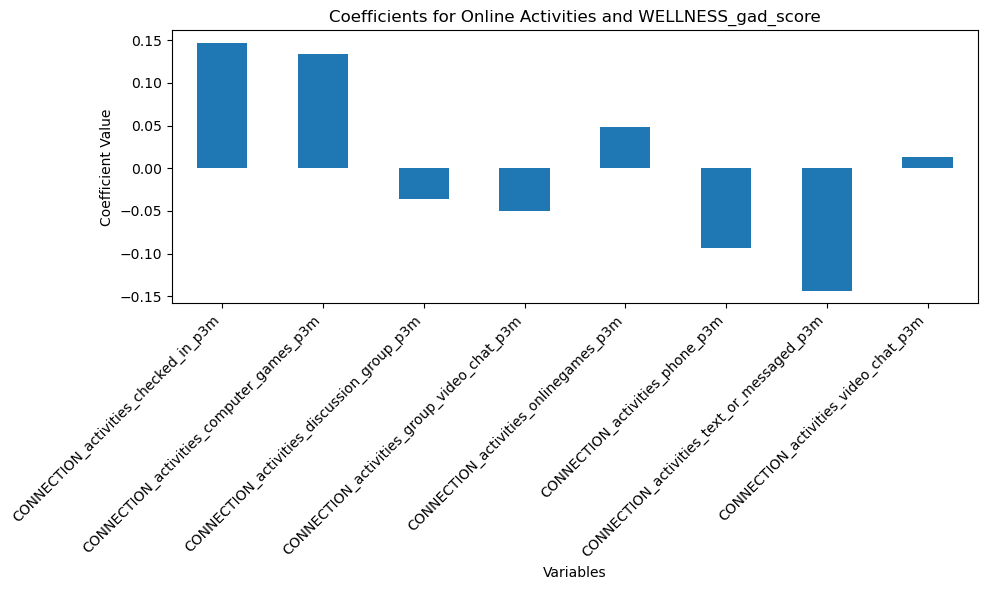

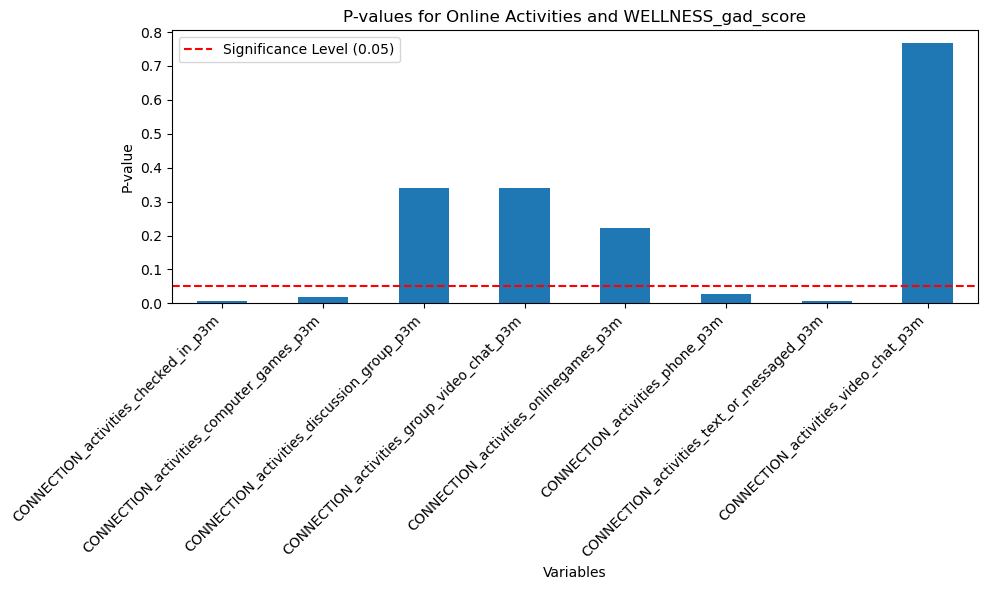

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:     WELLNESS_gad_score   R-squared:                       0.037
Model:                            OLS   Adj. R-squared:                  0.027
Method:                 Least Squares   F-statistic:                     3.785
Date:                Wed, 27 Nov 2024   Prob (F-statistic):           0.000227
Time:                        04:30:42   Log-Likelihood:                -1623.9
No. Observations:                 797   AIC:                             3266.
Df Residuals:                     788   BIC:                             3308.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
==============================================================================================================
                                                 coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------
const                                          2.3551      0.186     12.669      0.000       1.990       2.720
CONNECTION_activities_checked_in_p3m           0.1471      0.054      2.740      0.006       0.042       0.253
CONNECTION_activities_computer_games_p3m       0.1344      0.057      2.371      0.018       0.023       0.246
CONNECTION_activities_discussion_group_p3m    -0.0362      0.038     -0.955      0.340      -0.111       0.038
CONNECTION_activities_group_video_chat_p3m    -0.0506      0.053     -0.953      0.341      -0.155       0.054
CONNECTION_activities_onlinegames_p3m          0.0483      0.040      1.220      0.223      -0.029       0.126
CONNECTION_activities_phone_p3m               -0.0934      0.042     -2.226      0.026      -0.176      -0.011
CONNECTION_activities_text_or_messaged_p3m    -0.1439      0.054     -2.662      0.008      -0.250      -0.038
CONNECTION_activities_video_chat_p3m           0.0130      0.044      0.297      0.767      -0.073       0.099
==============================================================================
Omnibus:                       67.403   Durbin-Watson:                   1.465
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               58.669
Skew:                           0.588   Prob(JB):                     1.82e-13
Kurtosis:                       2.381   Cond. No.                         21.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [63]:
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt

# Define the independent variables (online activity variables)
independent_variables = [
    "CONNECTION_activities_checked_in_p3m",
    "CONNECTION_activities_computer_games_p3m",
    "CONNECTION_activities_discussion_group_p3m",
    "CONNECTION_activities_group_video_chat_p3m",
    "CONNECTION_activities_onlinegames_p3m",
    "CONNECTION_activities_phone_p3m",
    "CONNECTION_activities_text_or_messaged_p3m",
    "CONNECTION_activities_video_chat_p3m"
]

# Define the dependent variable
dependent_variable = "WELLNESS_gad_score"

# Subset the data for regression
X_online = filtered_data[independent_variables]
y_online = filtered_data[dependent_variable]

# Add a constant for the intercept term
X_online = sm.add_constant(X_online)

# Fit the OLS regression model
online_model = sm.OLS(y_online, X_online).fit()

# Extract coefficients and p-values
coefficients = online_model.params[1:]  # Exclude the constant
p_values = online_model.pvalues[1:]  # Exclude the constant

# Create the bar chart for coefficients
plt.figure(figsize=(10, 6))
coefficients.plot(kind='bar', title='Coefficients for Online Activities and WELLNESS_gad_score')
plt.ylabel('Coefficient Value')
plt.xlabel('Variables')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# Create the bar chart for p-values
plt.figure(figsize=(10, 6))
p_values.plot(kind='bar', title='P-values for Online Activities and WELLNESS_gad_score')
plt.ylabel('P-value')
plt.xlabel('Variables')
plt.axhline(y=0.05, color='r', linestyle='--', label='Significance Level (0.05)')
plt.legend()
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

online_model.summary()


# offline model with "WELLNESS_gad_score" as dependent variable

In [56]:
#offline model with "WELLNESS_gad_score" as dependent variable
import statsmodels.api as sm

# Define the independent variables (offline activity variables)
offline_independent_variables = [
    "CONNECTION_activities_board_games_p3m",
    "CONNECTION_activities_church_p3m",
    "CONNECTION_activities_coffee_p3m",
    "CONNECTION_activities_community_p3m",
    "CONNECTION_activities_helped_p3m",
    "CONNECTION_activities_hug_p3m",
    "CONNECTION_activities_kissed_p3m",
    "CONNECTION_activities_letter_or_email_p3m",
    "CONNECTION_activities_meeting_work_p3m",
    "CONNECTION_activities_new_friend_p3m",
    "CONNECTION_activities_sex_p3m",
    "CONNECTION_activities_talked_day_p3m",
    "CONNECTION_activities_talked_family_p3m",
    "CONNECTION_activities_talked_hobbies_p3m",
    "CONNECTION_activities_talked_job_p3m",
    "CONNECTION_activities_visited_family_p3m",
    "CONNECTION_activities_visited_friends_p3m",
    "CONNECTION_activities_walk_p3m"
]

# Define the dependent variable
dependent_variable = "WELLNESS_gad_score"

# Subset the data for regression
X_offline = filtered_data[offline_independent_variables]
y_offline = filtered_data[dependent_variable]

# Add a constant for the intercept term
X_offline = sm.add_constant(X_offline)

# Fit the OLS regression model
offline_model = sm.OLS(y_offline, X_offline).fit()

# Print the regression summary
offline_model_summary = offline_model.summary()
offline_model_summary


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:     WELLNESS_gad_score   R-squared:                       0.087
Model:                            OLS   Adj. R-squared:                  0.066
Method:                 Least Squares   F-statistic:                     4.107
Date:                Wed, 27 Nov 2024   Prob (F-statistic):           2.68e-08
Time:                        04:17:53   Log-Likelihood:                -1602.8
No. Observations:                 797   AIC:                             3244.
Df Residuals:                     778   BIC:                             3332.
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
=============================================================================================================
                                                coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------------
const                                         2.9798      0.198     15.081      0.000       2.592       3.368
CONNECTION_activities_board_games_p3m         0.0099      0.051      0.193      0.847      -0.091       0.111
CONNECTION_activities_church_p3m             -0.0770      0.058     -1.326      0.185      -0.191       0.037
CONNECTION_activities_coffee_p3m             -0.1578      0.048     -3.278      0.001      -0.252      -0.063
CONNECTION_activities_community_p3m          -0.0563      0.042     -1.352      0.177      -0.138       0.025
CONNECTION_activities_helped_p3m             -0.0575      0.057     -1.013      0.311      -0.169       0.054
CONNECTION_activities_hug_p3m                -0.0038      0.043     -0.088      0.930      -0.089       0.081
CONNECTION_activities_kissed_p3m             -0.0439      0.041     -1.075      0.283      -0.124       0.036
CONNECTION_activities_letter_or_email_p3m    -0.1325      0.037     -3.619      0.000      -0.204      -0.061
CONNECTION_activities_meeting_work_p3m        0.0199      0.037      0.538      0.591      -0.053       0.092
CONNECTION_activities_new_friend_p3m          0.0873      0.073      1.198      0.231      -0.056       0.230
CONNECTION_activities_sex_p3m                 0.0338      0.046      0.741      0.459      -0.056       0.124
CONNECTION_activities_talked_day_p3m         -0.0316      0.058     -0.543      0.587      -0.146       0.083
CONNECTION_activities_talked_family_p3m      -0.1331      0.062     -2.155      0.031      -0.254      -0.012
CONNECTION_activities_talked_hobbies_p3m      0.0482      0.050      0.969      0.333      -0.049       0.146
CONNECTION_activities_talked_job_p3m          0.0873      0.047      1.857      0.064      -0.005       0.180
CONNECTION_activities_visited_family_p3m      0.0053      0.042      0.125      0.900      -0.078       0.089
CONNECTION_activities_visited_friends_p3m     0.0143      0.052      0.273      0.785      -0.088       0.117
CONNECTION_activities_walk_p3m                0.0024      0.037      0.065      0.948      -0.070       0.075
==============================================================================
Omnibus:                       55.345   Durbin-Watson:                   1.474
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               50.015
Skew:                           0.546   Prob(JB):                     1.38e-11
Kurtosis:                       2.441   Cond. No.                         33.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

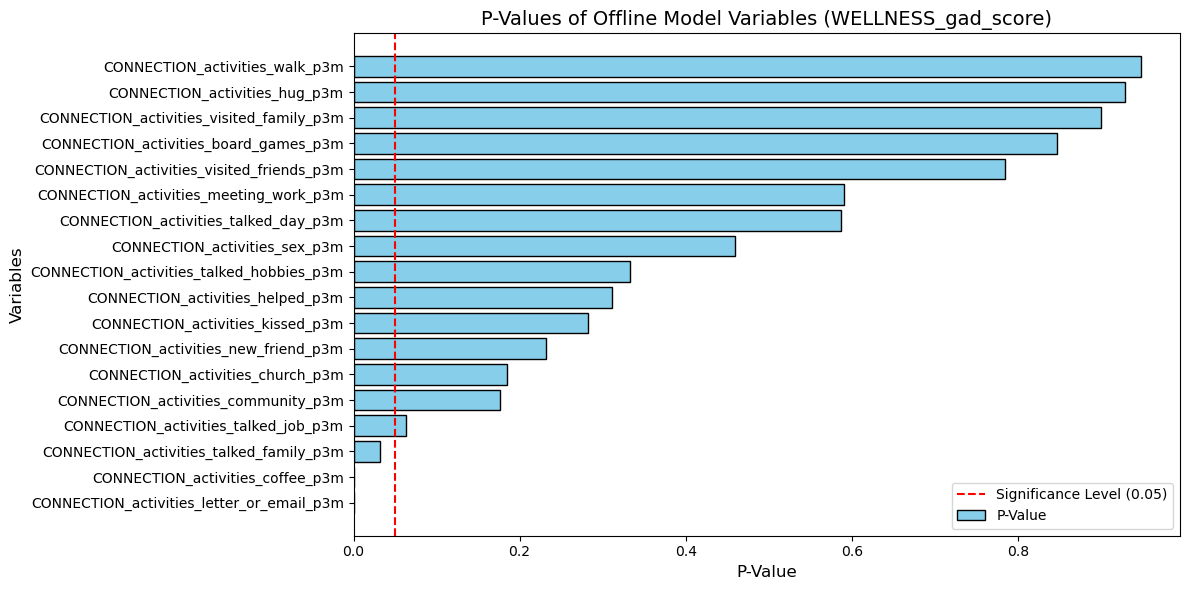

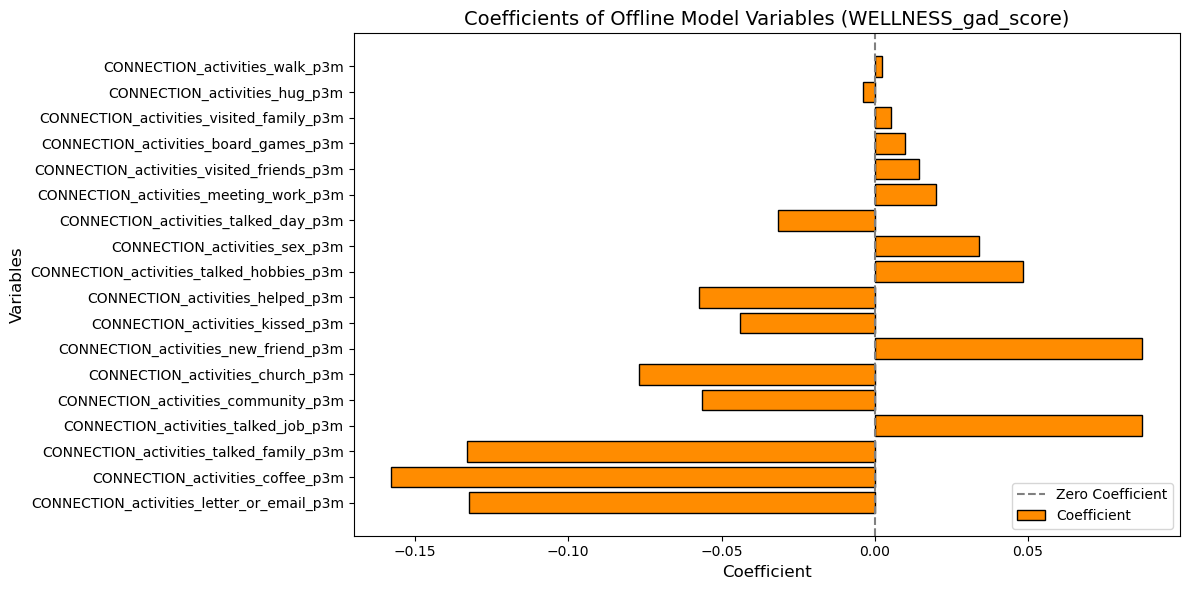

In [62]:
import matplotlib.pyplot as plt
import pandas as pd
import statsmodels.api as sm

# Define the independent variables (offline activity variables)
offline_independent_variables = [
    "CONNECTION_activities_board_games_p3m",
    "CONNECTION_activities_church_p3m",
    "CONNECTION_activities_coffee_p3m",
    "CONNECTION_activities_community_p3m",
    "CONNECTION_activities_helped_p3m",
    "CONNECTION_activities_hug_p3m",
    "CONNECTION_activities_kissed_p3m",
    "CONNECTION_activities_letter_or_email_p3m",
    "CONNECTION_activities_meeting_work_p3m",
    "CONNECTION_activities_new_friend_p3m",
    "CONNECTION_activities_sex_p3m",
    "CONNECTION_activities_talked_day_p3m",
    "CONNECTION_activities_talked_family_p3m",
    "CONNECTION_activities_talked_hobbies_p3m",
    "CONNECTION_activities_talked_job_p3m",
    "CONNECTION_activities_visited_family_p3m",
    "CONNECTION_activities_visited_friends_p3m",
    "CONNECTION_activities_walk_p3m"
]

# Define the dependent variable
dependent_variable = "WELLNESS_gad_score"

# Subset the data for regression
X_offline = filtered_data[offline_independent_variables]
y_offline = filtered_data[dependent_variable]

# Add a constant for the intercept term
X_offline = sm.add_constant(X_offline)

# Fit the OLS regression model
offline_model = sm.OLS(y_offline, X_offline).fit()

# Extract p-values and coefficients
offline_p_values = offline_model.pvalues[1:]  # Exclude the constant term
offline_coefficients = offline_model.params[1:]  # Exclude the constant term
offline_variables = offline_p_values.index

# Combine p-values and coefficients into a DataFrame
offline_results_df = pd.DataFrame({
    "Variable": offline_variables,
    "P-Value": offline_p_values,
    "Coefficient": offline_coefficients
}).sort_values(by="P-Value")

# Plot 1: P-Values
plt.figure(figsize=(12, 6))
plt.barh(offline_results_df["Variable"], offline_results_df["P-Value"], color="skyblue", edgecolor="black", label="P-Value")
plt.axvline(x=0.05, color="red", linestyle="--", label="Significance Level (0.05)")
plt.xlabel("P-Value", fontsize=12)
plt.ylabel("Variables", fontsize=12)
plt.title("P-Values of Offline Model Variables (WELLNESS_gad_score)", fontsize=14)
plt.legend(loc="lower right")
plt.tight_layout()
plt.show()

# Plot 2: Coefficients
plt.figure(figsize=(12, 6))
plt.barh(offline_results_df["Variable"], offline_results_df["Coefficient"], color="darkorange", edgecolor="black", label="Coefficient")
plt.axvline(x=0, color="gray", linestyle="--", label="Zero Coefficient")
plt.xlabel("Coefficient", fontsize=12)
plt.ylabel("Variables", fontsize=12)
plt.title("Coefficients of Offline Model Variables (WELLNESS_gad_score)", fontsize=14)
plt.legend(loc="lower right")
plt.tight_layout()
plt.show()


# online model with "WELLNESS_phq_score" as dependent variable

In [58]:
#online model with "WELLNESS_phq_score" as dependent variable
import pandas as pd
import statsmodels.api as sm

# Assuming `filtered_data` is your dataset
# Define the independent variables (online activity variables)
independent_variables = [
    "CONNECTION_activities_checked_in_p3m",
    "CONNECTION_activities_computer_games_p3m",
    "CONNECTION_activities_discussion_group_p3m",
    "CONNECTION_activities_group_video_chat_p3m",
    "CONNECTION_activities_onlinegames_p3m",
    "CONNECTION_activities_phone_p3m",
    "CONNECTION_activities_text_or_messaged_p3m",
    "CONNECTION_activities_video_chat_p3m"
]

# Define the dependent variable
dependent_variable = "WELLNESS_phq_score"

# Subset the data for regression
X = filtered_data[independent_variables]
y = filtered_data[dependent_variable]

# Add a constant for the intercept term
X = sm.add_constant(X)

# Fit the OLS regression model
model = sm.OLS(y, X).fit()

# Print the regression summary
print(model.summary())


                            OLS Regression Results                            
Dep. Variable:     WELLNESS_phq_score   R-squared:                       0.080
Model:                            OLS   Adj. R-squared:                  0.071
Method:                 Least Squares   F-statistic:                     8.619
Date:                Wed, 27 Nov 2024   Prob (F-statistic):           2.61e-11
Time:                        04:22:36   Log-Likelihood:                -1601.6
No. Observations:                 797   AIC:                             3221.
Df Residuals:                     788   BIC:                             3263.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                                                 coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------

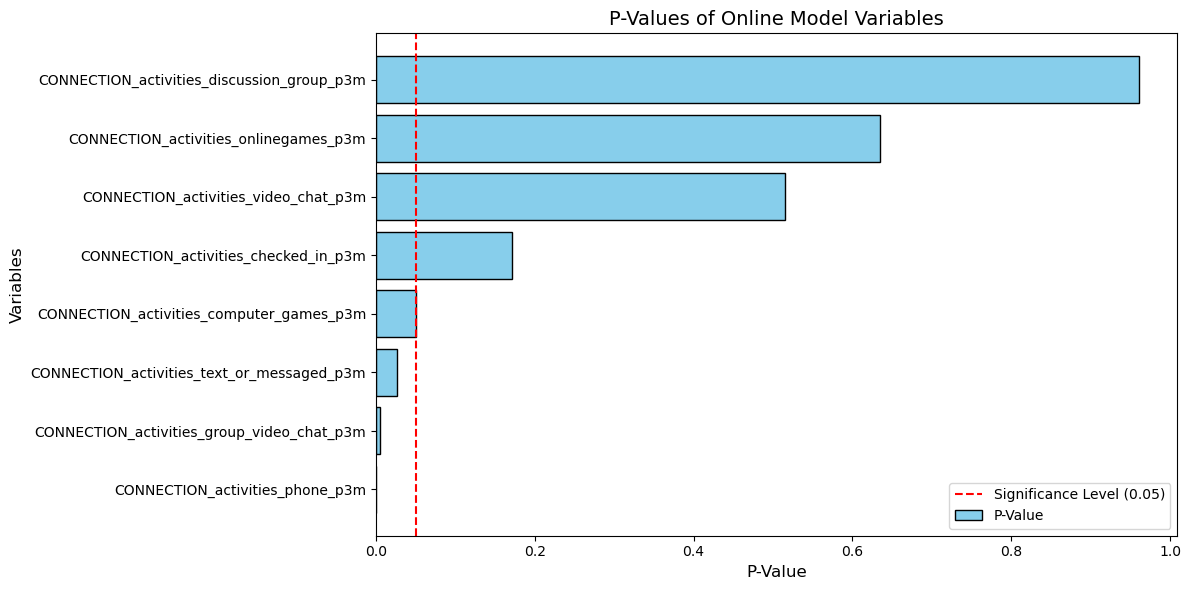

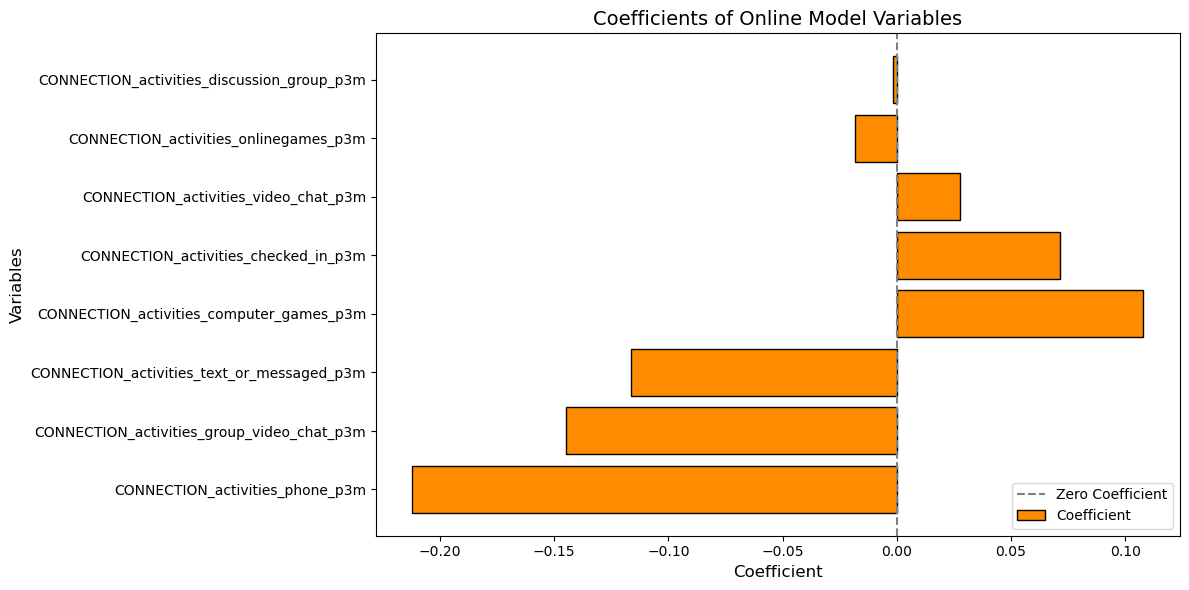

In [61]:
import matplotlib.pyplot as plt
import pandas as pd

# Extract p-values and coefficients from the online model
p_values = model.pvalues[1:]  # Exclude the constant term
coefficients = model.params[1:]  # Exclude the constant term
variables = p_values.index

# Combine p-values and coefficients into a DataFrame
results_df = pd.DataFrame({
    "Variable": variables,
    "P-Value": p_values,
    "Coefficient": coefficients
}).sort_values(by="P-Value")

# Plot 1: P-Values
plt.figure(figsize=(12, 6))
plt.barh(results_df["Variable"], results_df["P-Value"], color="skyblue", edgecolor="black", label="P-Value")
plt.axvline(x=0.05, color="red", linestyle="--", label="Significance Level (0.05)")
plt.xlabel("P-Value", fontsize=12)
plt.ylabel("Variables", fontsize=12)
plt.title("P-Values of Online Model Variables", fontsize=14)
plt.legend(loc="lower right")
plt.tight_layout()
plt.show()

# Plot 2: Coefficients
plt.figure(figsize=(12, 6))
plt.barh(results_df["Variable"], results_df["Coefficient"], color="darkorange", edgecolor="black", label="Coefficient")
plt.axvline(x=0, color="gray", linestyle="--", label="Zero Coefficient")
plt.xlabel("Coefficient", fontsize=12)
plt.ylabel("Variables", fontsize=12)
plt.title("Coefficients of Online Model Variables", fontsize=14)
plt.legend(loc="lower right")
plt.tight_layout()
plt.show()


# offline model with "WELLNESS_phq_score" as dependent variable

In [57]:
#offline model with "WELLNESS_phq_score" as dependent variable
import statsmodels.api as sm

# Define the independent variables (offline activity variables)
offline_independent_variables = [
    "CONNECTION_activities_board_games_p3m",
    "CONNECTION_activities_church_p3m",
    "CONNECTION_activities_coffee_p3m",
    "CONNECTION_activities_community_p3m",
    "CONNECTION_activities_helped_p3m",
    "CONNECTION_activities_hug_p3m",
    "CONNECTION_activities_kissed_p3m",
    "CONNECTION_activities_letter_or_email_p3m",
    "CONNECTION_activities_meeting_work_p3m",
    "CONNECTION_activities_new_friend_p3m",
    "CONNECTION_activities_sex_p3m",
    "CONNECTION_activities_talked_day_p3m",
    "CONNECTION_activities_talked_family_p3m",
    "CONNECTION_activities_talked_hobbies_p3m",
    "CONNECTION_activities_talked_job_p3m",
    "CONNECTION_activities_visited_family_p3m",
    "CONNECTION_activities_visited_friends_p3m",
    "CONNECTION_activities_walk_p3m"
]

# Define the dependent variable
dependent_variable = "WELLNESS_phq_score"

# Subset the data for regression
X_offline = filtered_data[offline_independent_variables]
y_offline = filtered_data[dependent_variable]

# Add a constant for the intercept term
X_offline = sm.add_constant(X_offline)

# Fit the OLS regression model
offline_model = sm.OLS(y_offline, X_offline).fit()

# Print the regression summary
offline_model_summary = offline_model.summary()
offline_model_summary


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:     WELLNESS_phq_score   R-squared:                       0.159
Model:                            OLS   Adj. R-squared:                  0.140
Method:                 Least Squares   F-statistic:                     8.189
Date:                Wed, 27 Nov 2024   Prob (F-statistic):           3.22e-20
Time:                        04:19:02   Log-Likelihood:                -1565.8
No. Observations:                 797   AIC:                             3170.
Df Residuals:                     778   BIC:                             3259.
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
=============================================================================================================
                                                coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------------
const                                         3.7214      0.189     19.727      0.000       3.351       4.092
CONNECTION_activities_board_games_p3m        -0.0628      0.049     -1.278      0.202      -0.159       0.034
CONNECTION_activities_church_p3m             -0.0719      0.055     -1.297      0.195      -0.181       0.037
CONNECTION_activities_coffee_p3m             -0.1011      0.046     -2.199      0.028      -0.191      -0.011
CONNECTION_activities_community_p3m          -0.0373      0.040     -0.937      0.349      -0.115       0.041
CONNECTION_activities_helped_p3m              0.0193      0.054      0.357      0.721      -0.087       0.126
CONNECTION_activities_hug_p3m                 0.0040      0.041      0.098      0.922      -0.077       0.085
CONNECTION_activities_kissed_p3m             -0.0828      0.039     -2.123      0.034      -0.159      -0.006
CONNECTION_activities_letter_or_email_p3m    -0.1178      0.035     -3.369      0.001      -0.186      -0.049
CONNECTION_activities_meeting_work_p3m       -0.0475      0.035     -1.347      0.178      -0.117       0.022
CONNECTION_activities_new_friend_p3m          0.0038      0.070      0.054      0.957      -0.133       0.140
CONNECTION_activities_sex_p3m                 0.0396      0.044      0.909      0.364      -0.046       0.125
CONNECTION_activities_talked_day_p3m         -0.0985      0.056     -1.771      0.077      -0.208       0.011
CONNECTION_activities_talked_family_p3m      -0.2395      0.059     -4.063      0.000      -0.355      -0.124
CONNECTION_activities_talked_hobbies_p3m      0.0730      0.048      1.537      0.125      -0.020       0.166
CONNECTION_activities_talked_job_p3m          0.0730      0.045      1.626      0.104      -0.015       0.161
CONNECTION_activities_visited_family_p3m     -0.0138      0.040     -0.341      0.733      -0.093       0.066
CONNECTION_activities_visited_friends_p3m     0.0234      0.050      0.468      0.640      -0.075       0.121
CONNECTION_activities_walk_p3m               -0.0661      0.035     -1.864      0.063      -0.136       0.003
==============================================================================
Omnibus:                       43.431   Durbin-Watson:                   1.513
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               48.748
Skew:                           0.593   Prob(JB):                     2.60e-11
Kurtosis:                       2.753   Cond. No.                         33.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

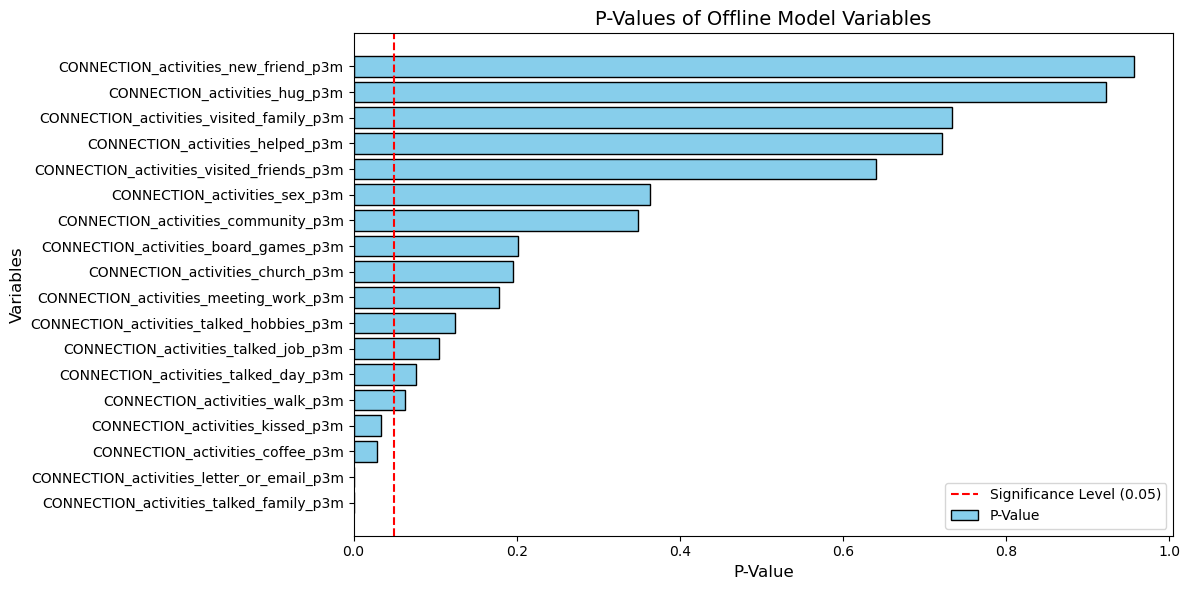

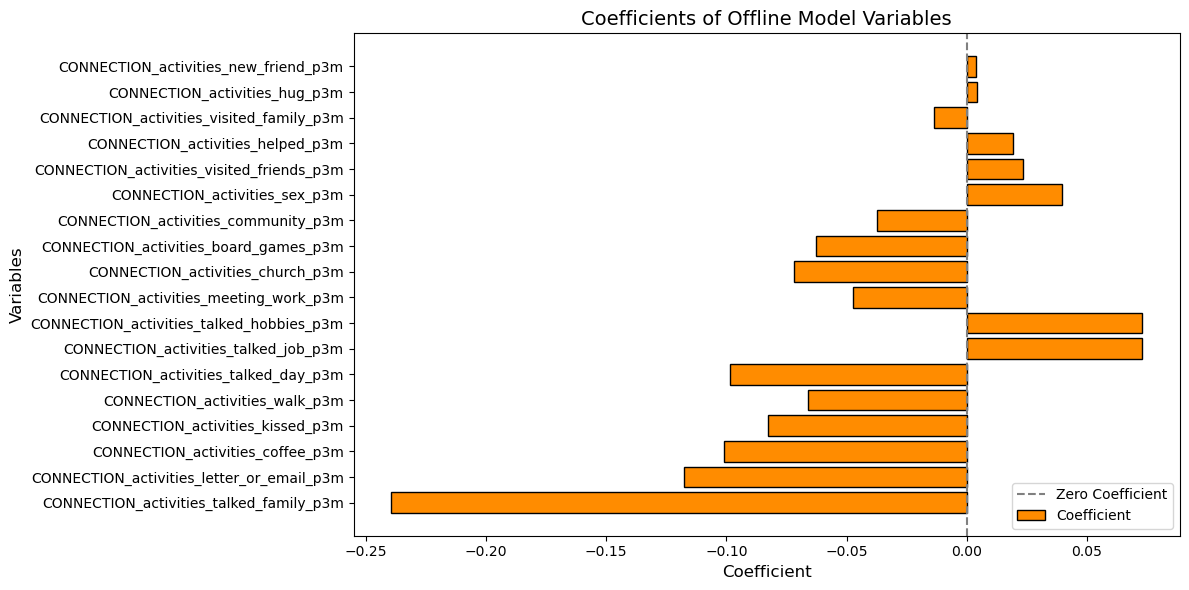

In [60]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Extract p-values and coefficients from the model
p_values = offline_model.pvalues[1:]  # Exclude the constant term
coefficients = offline_model.params[1:]  # Exclude the constant term
variables = p_values.index

# Combine p-values and coefficients into a DataFrame
results_df = pd.DataFrame({
    "Variable": variables,
    "P-Value": p_values,
    "Coefficient": coefficients
}).sort_values(by="P-Value")

# Plot 1: P-Values
plt.figure(figsize=(12, 6))
plt.barh(results_df["Variable"], results_df["P-Value"], color="skyblue", edgecolor="black", label="P-Value")
plt.axvline(x=0.05, color="red", linestyle="--", label="Significance Level (0.05)")
plt.xlabel("P-Value", fontsize=12)
plt.ylabel("Variables", fontsize=12)
plt.title("P-Values of Offline Model Variables", fontsize=14)
plt.legend(loc="lower right")
plt.tight_layout()
plt.show()

# Plot 2: Coefficients
plt.figure(figsize=(12, 6))
plt.barh(results_df["Variable"], results_df["Coefficient"], color="darkorange", edgecolor="black", label="Coefficient")
plt.axvline(x=0, color="gray", linestyle="--", label="Zero Coefficient")
plt.xlabel("Coefficient", fontsize=12)
plt.ylabel("Variables", fontsize=12)
plt.title("Coefficients of Offline Model Variables", fontsize=14)
plt.legend(loc="lower right")
plt.tight_layout()
plt.show()


## independent variables(y)

"WELLNESS_subjective_happiness_scale_score": A brief, self-report measure consisting of a few items where participants rate their happiness relative to others or describe their general state of happiness. The scores from the SHS provide an index of subjective well-being or happiness as perceived by the individual. Higher scores indicating greater levels of subjective happiness. Lower scores suggesting lower levels of perceived happiness.

"WELLNESS_phq_score": A score derived from the Patient Health Questionnaire (PHQ), a widely used self-administered tool for assessing mental health, particularly symptoms of depression.

"WELLNESS_gad_score": A score derived from the Generalized Anxiety Disorder (GAD) scale, commonly the GAD-7, which is a widely used tool for assessing the severity of anxiety symptoms.



In [52]:
independent_variables = filtered_data[[
    'WELLNESS_subjective_happiness_scale_score',
    'WELLNESS_phq_score', 
    'WELLNESS_gad_score'
]]
independent_variables

,WELLNESS_subjective_happiness_scale_score,WELLNESS_phq_score,WELLNESS_gad_score
19,5.00,1.0,0.0
21,5.25,1.0,0.0
71,6.00,0.0,0.0
77,6.00,0.0,0.0
78,6.00,0.0,1.0
...,...,...,...
11379,3.00,3.0,4.0
11380,3.50,3.0,2.0
11412,4.75,1.0,2.0
11428,3.75,3.0,2.0


---

## Binary

Low Frequency：0

- Not in the past three months

- Less than monthly

- Monthly


High Frequency：1

- A few times a month

- Weekly

- A few times a week

- Daily or almost daily

In [ ]:
frequency_mapping = {
    "Not in the past three months": 0,
    "Less than monthly": 0,
    "Monthly": 0,
    "A few times a month": 1,
    "Weekly": 1,
    "A few times a week": 1,
    "Daily or almost daily": 1
}

# replace
filtered_data[dependent_variables.columns] = dependent_variables.applymap(lambda x: frequency_mapping.get(x, x))

# data
filtered_data

In [ ]:
for col in filtered_data.columns:
    col_summary = filtered_data[col].value_counts(dropna=False)
    if len(col_summary)<11:
        print(col_summary, "\n")
    else:
        print(col, filtered_data[col].shape, "\n")